# DATA WRANGLING WITH PYTHON

### INTRODUCTION

In this project, I will be analysing series of dataset on Dog ratings given by [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a social media group responsible for rating dogs and can be seen in their [twitter handle](https://twitter.com/dog_rates) where they occasionally rate dogs. They have over 5000 dog rates datasets which we will be gathering from different points to analyse.

We will start by gathering the data from 3 different sources:
- [Twitter archive csv file](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) made available by Udacity
- [Image predictions tsv file](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) also made availa ble by Udacity
- Twitter Json text file using [tweepy](https://www.tweepy.org/), the twitter api for data extraction to scape the data

Questions we will be answering from this analysis includes:
1. What breads of dogs are the most rated and least common ratings
2. Which dog types had the most retweets and favorites
3. Which dog nicknames are ther most/least common
4. What is the relationship between dogs breeds and their nicknames

### Gathering Data

First read the csv file already downloaded.

In [1]:
import pandas as pd
import numpy as np

In [2]:
twitter_csv = pd.read_csv('twitter-archive-enhanced.csv')
twitter_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Next get the tsv data using requests library

In [3]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r.status_code

200

In [4]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [5]:
with open('image_predictions.tsv', 'w') as f:
    f.write(r.text)

In [6]:
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Lastly, we will use tweepy to get the tweet in json format

In [7]:

"""
Using Tweepy to scrape tweets data from dog_rates handle

We will comment out this cell till we are able to get access to tweepy
======================================================================

import tweepy

consumer_key = "xxxx"
consumer_secret = "xxxx"
access_token = "xxxx"
access_token_secret = "xxxx"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

"""

'\nUsing Tweepy to scrape tweets data from dog_rates handle\n\nWe will comment out this cell till we are able to get access to tweepy\n======================================================================\n\nimport tweepy\n\nconsumer_key = "xxxx"\nconsumer_secret = "xxxx"\naccess_token = "xxxx"\naccess_token_secret = "xxxx"\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_token_secret)\napi = tweepy.API(auth, wait_on_rate_limit = True)\n\n'

In [8]:
"""
Also commenting out this cell till we get access to tweepy
==========================================================

import time

username = 'dog_rates'
count = 5000

try:
    tweets = tweepy.Cursor(api.user_timeline, id = username).items(count)
    
    tweet_list = [[tweet.created_at, 
                    tweet.id, 
                    tweet.text, 
                    tweet.in_reply_to_status_id, 
                    tweet.retweet_count, 
                    tweet.favorite_count,  
                    tweet.lang] for tweet in tweets]
    
    tweetss_df = pd.DataFrame(tweet_list)
    
except BaseException as e:
    print('failed on_status,', str(e))
    time.sleep(3)
    
"""

"\nAlso commenting out this cell till we get access to tweepy\n==========================================================\n\nimport time\n\nusername = 'dog_rates'\ncount = 5000\n\ntry:\n    tweets = tweepy.Cursor(api.user_timeline, id = username).items(count)\n    \n    tweet_list = [[tweet.created_at, \n                    tweet.id, \n                    tweet.text, \n                    tweet.in_reply_to_status_id, \n                    tweet.retweet_count, \n                    tweet.favorite_count,  \n                    tweet.lang] for tweet in tweets]\n    \n    tweetss_df = pd.DataFrame(tweet_list)\n    \nexcept BaseException as e:\n    print('failed on_status,', str(e))\n    time.sleep(3)\n    \n"

In [9]:
# reading the tweet json data from a txt file

import json

json_df = pd.DataFrame([json.loads(line) for line in open('tweet-json.txt','r')])
    
json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


### Visual Assesment of data

In [10]:
twitter_df = twitter_csv.copy()
img_pred_df = image_prediction.copy()
jsn_df = json_df.copy()

In [11]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
img_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
jsn_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


### Programatic Assessment

#### twitter_df

In [14]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [16]:
twitter_df.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [17]:
twitter_df.duplicated().sum()

0

In [18]:
twitter_df['pupper'].unique()

array(['None', 'pupper'], dtype=object)

#### img_pred_df

In [19]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
img_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
img_pred_df.query('p1_conf == 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [22]:
img_pred_df.duplicated().sum()

0

In [23]:
img_pred_df['p3'].unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

#### jsn_df

In [24]:
jsn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [25]:
jsn_df[jsn_df['place'].notnull()==True]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
857,Wed Aug 10 01:23:03 +0000 2016,763183847194451968,763183847194451968,This is Clark. He collects teddy bears. It's a...,False,"[0, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 763183833575481344, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6004,False,False,False,False,en,NaN,NaN,NaN,NaN


In [26]:
jsn_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [27]:
jsn_df.query('retweet_count == 0 or favorite_count == 0')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,NaN
35,Thu Jul 13 01:35:06 +0000 2017,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN
67,Mon Jun 26 00:13:58 +0000 2017,879130579576475649,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN
72,Sat Jun 24 00:09:53 +0000 2017,878404777348136964,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN
73,Fri Jun 23 18:17:33 +0000 2017,878316110768087041,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,Sat Jun 25 01:52:36 +0000 2016,746521445350707200,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN
1041,Fri Jun 17 16:01:16 +0000 2016,743835915802583040,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN
1240,Mon Mar 21 19:31:59 +0000 2016,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN
2257,Fri Nov 20 03:51:52 +0000 2015,667550904950915073,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,0,False,False,False,False,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN


In [28]:
all_columns = pd.Series(list(twitter_df) + list(img_pred_df) + list(jsn_df))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

### Results of Assessment
#### Quality Issues
##### Twitter_df:
1. There are 78 of the tweets that are not original tweets - they are in reply to a tweet
2. retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are not needed
3. expanded_urls has some missing items
4. The 2 rating_numerator with 0 value are not dog or animal rating
5. Most rating_numerator with values less than 6 are not dogs but other animals.
6. Timestamp datatype is string instead of datetime
7. Row 979 haas a rating_numerator of 1776 which is an outlier
8. source column is not required
9. Some expanded_urls has multiple url values seperated by a comma

##### img_pred_df:
1. Incomplete data. Expected to contain 2356 rows.
2. Row 106 has a p1_conf of 1 which is an outlier
3. p1, p2, and p3 do not have unique word seperation (some use underscore while others use dash)

##### jsn_df:
1. Incomplete data. Expected to contain 2356 rows.
2. created_at datatype is string instead of datetime
3. geo and coordinates does not have any value while places have only one value
4. display_text_range, entities, extended_entities, and retweeted_status all have multiple values for each of the columns

#### Tidiness Issues
1. doggo, floofer, pupper, puppo columns are not necessary as seperate columns
2. Information about one type of observational unit (tweets) is spread across three different files/dataframes


### Cleaning The Data

#### Define

##### Twitter_df:
1. Drop the rows of the non-original tweet (Rewteest represented by tweet texts starting with RT @.
2. Drop all the columns not needed - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
3. Imput expanded_urls missing values by concating url left part with the tweet id
4. Drop the 2 rating_numerator with zero numerator
5. Change Timestamp datatype to datetime
6. Drop the outlier in row 979
7. Melt doggo, floofer, pupper, puppo columns into a single column 
8. Split the expanded_urls values by comma and take the first

##### img_pred_df:
1. We cannot find to add the incomplete data. We will either drop from twitter_df or do nothing
2. Drop the outlier in row 106
3. Replace all word seperator with underscore in p1, p2 and p3

##### jsn_df:
1. Change created_at datatype to datetime
2. Drop geo, coordinates, and places columns
3. Split all the values in each of the columns display_text_range and take the second value
4. merge this table with the twitter_df on tweet_id

#### Code
##### Twitter_df:

In [29]:
twitter_df = twitter_df[twitter_df.retweeted_status_id.isnull()]
twitter_df = twitter_df[twitter_df.retweeted_status_user_id.isnull()]
twitter_df = twitter_df[twitter_df.retweeted_status_timestamp.isnull()]


In [30]:
twitter_df = twitter_df[twitter_df['text'].str[:4] != 'RT @']

In [31]:
twitter_df = twitter_df.drop(['in_reply_to_status_id', 
                              'in_reply_to_user_id', 
                              'retweeted_status_id', 
                              'retweeted_status_user_id', 
                              'retweeted_status_timestamp'], axis=1)

In [32]:
url_left = 'https://twitter.com/dog_rates/status/'
url_right = '/photo/1'

for i in range(twitter_df.shape[0]):
    twitter_df.expanded_urls.iloc[i] = url_left + twitter_df.tweet_id.iloc[i].astype(str) + url_right
    

/var/folders/c9/8lp3ylpd2sl45tswp801h7bc0000gp/T/ipykernel_36646/1599585644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df.expanded_urls.iloc[i] = url_left + twitter_df.tweet_id.iloc[i].astype(str) + url_right


In [33]:
twitter_df.timestamp = twitter_df.timestamp.str[:-6]

twitter_df.timestamp = pd.to_datetime(twitter_df.timestamp) #, format="%Y/%m/%d, %H:%M:%S")

In [34]:
twitter_df = twitter_df[twitter_df.rating_numerator > 0]

In [35]:
twitter_df = twitter_df[twitter_df.rating_numerator != 1776]

In [36]:
twitter_df = pd.melt(twitter_df, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                    var_name='value', value_name='stage')

twitter_df = twitter_df.drop(['value'], axis=1)


In [37]:
twitter_df.expanded_urls = twitter_df.expanded_urls.str.split(',', n=1)

#### Test
##### Twitter_df:

In [38]:
x = twitter_df.expanded_urls[17]

print(x)

['https://twitter.com/dog_rates/status/888804989199671297/photo/1']


In [39]:
twitter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,[https://twitter.com/dog_rates/status/89242064...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,[https://twitter.com/dog_rates/status/89217742...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,[https://twitter.com/dog_rates/status/89181518...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,[https://twitter.com/dog_rates/status/89168955...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,[https://twitter.com/dog_rates/status/89132755...,12,10,Franklin,None


In [40]:
twitter_df.expanded_urls.isnull().sum()

0

In [41]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688 entries, 0 to 8687
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            8688 non-null   int64         
 1   timestamp           8688 non-null   datetime64[ns]
 2   source              8688 non-null   object        
 3   text                8688 non-null   object        
 4   expanded_urls       8688 non-null   object        
 5   rating_numerator    8688 non-null   int64         
 6   rating_denominator  8688 non-null   int64         
 7   name                8688 non-null   object        
 8   stage               8688 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 611.0+ KB


In [42]:
twitter_df.describe()

,tweet_id,rating_numerator,rating_denominator
count,8.688000e+03,8688.000000,8688.000000
mean,7.370649e+17,12.415746,10.493554
std,6.748794e+16,29.128499,7.022695
min,6.660209e+17,1.000000,0.000000
25%,6.768214e+17,10.000000,10.000000
50%,7.095616e+17,11.000000,10.000000
75%,7.893685e+17,12.000000,10.000000
max,8.924206e+17,960.000000,170.000000


#### Code
##### img_pred_df:

In [43]:
img_pred_df = img_pred_df[img_pred_df.p1_conf < 1]

In [44]:
for col in ['p1', 'p2', 'p3']:
    img_pred_df[col].replace('-', '_', inplace=True)

/var/folders/c9/8lp3ylpd2sl45tswp801h7bc0000gp/T/ipykernel_36646/1004014872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_pred_df[col].replace('-', '_', inplace=True)


#### Test
##### img_pred_df:

In [45]:
img_pred_df.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1094,719991154352222208,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,golden_retriever,0.605304,True,cocker_spaniel,0.130948,True,Labrador_retriever,0.094692,True
503,675878199931371520,https://pbs.twimg.com/media/CWEzo19WoAEiOCj.jpg,1,wood_rabbit,0.785756,False,hare,0.118181,False,Cardigan,0.043627,True
408,673711475735838725,https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg,1,Maltese_dog,0.607401,True,toy_poodle,0.143836,True,Sealyham_terrier,0.063907,True
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False
175,669037058363662336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,Chihuahua,0.803528,True,Pomeranian,0.053871,True,chow,0.032257,True
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,Chihuahua,0.368876,True,Pomeranian,0.282102,True,papillon,0.178795,True
1100,720775346191278080,https://pbs.twimg.com/media/CgC1WqMW4AI1_N0.jpg,1,Newfoundland,0.489970,True,groenendael,0.174497,True,giant_schnauzer,0.079067,True
547,677331501395156992,https://pbs.twimg.com/media/CWZdaGxXAAAjGjb.jpg,1,beagle,0.313464,True,boxer,0.218503,True,French_bulldog,0.106462,True
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True
1488,782305867769217024,https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg,1,briard,0.504427,True,soft-coated_wheaten_terrier,0.390678,True,Lhasa,0.034596,True


In [46]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2074 non-null   int64  
 1   jpg_url   2074 non-null   object 
 2   img_num   2074 non-null   int64  
 3   p1        2074 non-null   object 
 4   p1_conf   2074 non-null   float64
 5   p1_dog    2074 non-null   bool   
 6   p2        2074 non-null   object 
 7   p2_conf   2074 non-null   float64
 8   p2_dog    2074 non-null   bool   
 9   p3        2074 non-null   object 
 10  p3_conf   2074 non-null   float64
 11  p3_dog    2074 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.1+ KB


#### Code
##### jsn_df:

In [47]:
jsn_df.created_at = pd.to_datetime(jsn_df.created_at)

In [48]:
jsn_df = jsn_df.drop(['geo', 'coordinates', 'place'], axis=1)

In [49]:
jsn_df = jsn_df[jsn_df.in_reply_to_status_id.isnull()]

jsn_df = jsn_df.drop(['id_str', 
                      'in_reply_to_status_id', 
                      'in_reply_to_user_id', 
                      'in_reply_to_status_id_str', 
                      'in_reply_to_user_id_str', 
                      'in_reply_to_screen_name', 
                      'possibly_sensitive', 
                      'possibly_sensitive_appealable', 
                      'retweeted_status', 
                      'quoted_status_id', 
                      'quoted_status_id_str', 
                      'quoted_status', 
                      'contributors', 
                      'entities', 
                      'extended_entities'], axis=1)

In [50]:
jsn_df.display_text_range = jsn_df.display_text_range.apply(lambda x: x[-1])

In [51]:
# get the id and screen name from user column
jsn_df['user_id'] = jsn_df.user.apply(lambda x: x.get('id_str'))
jsn_df['user_name'] = jsn_df.user.apply(lambda x: x.get('screen_name'))

jsn_df = jsn_df.drop('user', axis=1)

#### Test
##### jsn_df:

In [52]:
jsn_df.head()

,created_at,id,full_text,truncated,display_text_range,source,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,user_id,user_name
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,85,"<a href=""http://twitter.com/download/iphone"" r...",False,8853,39467,False,False,en,4196983835,dog_rates
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,138,"<a href=""http://twitter.com/download/iphone"" r...",False,6514,33819,False,False,en,4196983835,dog_rates
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,121,"<a href=""http://twitter.com/download/iphone"" r...",False,4328,25461,False,False,en,4196983835,dog_rates
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,79,"<a href=""http://twitter.com/download/iphone"" r...",False,8964,42908,False,False,en,4196983835,dog_rates
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,138,"<a href=""http://twitter.com/download/iphone"" r...",False,9774,41048,False,False,en,4196983835,dog_rates


In [53]:
jsn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2276 non-null   datetime64[ns, UTC]
 1   id                  2276 non-null   int64              
 2   full_text           2276 non-null   object             
 3   truncated           2276 non-null   bool               
 4   display_text_range  2276 non-null   int64              
 5   source              2276 non-null   object             
 6   is_quote_status     2276 non-null   bool               
 7   retweet_count       2276 non-null   int64              
 8   favorite_count      2276 non-null   int64              
 9   favorited           2276 non-null   bool               
 10  retweeted           2276 non-null   bool               
 11  lang                2276 non-null   object             
 12  user_id             2276 non-null 

#### Code:

In [54]:
twitter_df.shape

(8688, 9)

In [55]:
jsn_df.shape

(2276, 14)

In [56]:
img_pred_df.shape

(2074, 12)

In [57]:
twitter_merged = pd.merge(twitter_df, img_pred_df, how='inner', on = 'tweet_id').merge(jsn_df, how='inner', left_on = 'tweet_id', right_on = 'id')


In [58]:
twitter_merged = twitter_merged.loc[twitter_merged.astype(str).drop_duplicates().index]

In [59]:
twitter_merged.shape

(2281, 34)

In [60]:
twitter_merged.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,display_text_range,source_y,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,user_id,user_name
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,[https://twitter.com/dog_rates/status/89242064...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,85,"<a href=""http://twitter.com/download/iphone"" r...",False,8853,39467,False,False,en,4196983835,dog_rates
4,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,[https://twitter.com/dog_rates/status/89217742...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,138,"<a href=""http://twitter.com/download/iphone"" r...",False,6514,33819,False,False,en,4196983835,dog_rates
8,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,[https://twitter.com/dog_rates/status/89181518...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,121,"<a href=""http://twitter.com/download/iphone"" r...",False,4328,25461,False,False,en,4196983835,dog_rates
12,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,[https://twitter.com/dog_rates/status/89168955...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,79,"<a href=""http://twitter.com/download/iphone"" r...",False,8964,42908,False,False,en,4196983835,dog_rates
16,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,[https://twitter.com/dog_rates/status/89132755...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,138,"<a href=""http://twitter.com/download/iphone"" r...",False,9774,41048,False,False,en,4196983835,dog_rates


In [61]:
twitter_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2281 entries, 0 to 7868
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2281 non-null   int64              
 1   timestamp           2281 non-null   datetime64[ns]     
 2   source_x            2281 non-null   object             
 3   text                2281 non-null   object             
 4   expanded_urls       2281 non-null   object             
 5   rating_numerator    2281 non-null   int64              
 6   rating_denominator  2281 non-null   int64              
 7   name                2281 non-null   object             
 8   stage               2281 non-null   object             
 9   jpg_url             2281 non-null   object             
 10  img_num             2281 non-null   int64              
 11  p1                  2281 non-null   object             
 12  p1_conf             2281 non-null 

In [62]:
twitter_merged['favorite_count'].min() #query('favorite_count >= 0')

81

In [63]:
twitter_merged = twitter_merged.drop(['source_x', 
                                      'id', 
                                      'full_text', 
                                      'truncated', 
                                      'source_y', 
                                      'jpg_url', 
                                      'img_num'], axis=1)

In [64]:
twitter_merged.stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [65]:
twitter_merged.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,p1,p1_conf,...,created_at,display_text_range,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,user_id,user_name
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,[https://twitter.com/dog_rates/status/89242064...,13,10,Phineas,None,orange,0.097049,...,2017-08-01 16:23:56+00:00,85,False,8853,39467,False,False,en,4196983835,dog_rates
4,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,[https://twitter.com/dog_rates/status/89217742...,13,10,Tilly,None,Chihuahua,0.323581,...,2017-08-01 00:17:27+00:00,138,False,6514,33819,False,False,en,4196983835,dog_rates
8,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,[https://twitter.com/dog_rates/status/89181518...,12,10,Archie,None,Chihuahua,0.716012,...,2017-07-31 00:18:03+00:00,121,False,4328,25461,False,False,en,4196983835,dog_rates
12,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,[https://twitter.com/dog_rates/status/89168955...,13,10,Darla,None,paper_towel,0.170278,...,2017-07-30 15:58:51+00:00,79,False,8964,42908,False,False,en,4196983835,dog_rates
16,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,[https://twitter.com/dog_rates/status/89132755...,12,10,Franklin,None,basset,0.555712,...,2017-07-29 16:00:24+00:00,138,False,9774,41048,False,False,en,4196983835,dog_rates


#### Saving The Dataframe to a File

In [66]:
twitter_merged.to_csv('twitter_archive_master.csv', index=False)

## Analysing Data

In [67]:
import matplotlib, matplotlib.pyplot as plt
%matplotlib inline

params = {'axes.titlesize':'45',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)

In [68]:
df_twitter = pd.read_csv('twitter_archive_master.csv')
df_twitter.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,p1,p1_conf,...,created_at,display_text_range,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,user_id,user_name
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,['https://twitter.com/dog_rates/status/8924206...,13,10,Phineas,None,orange,0.097049,...,2017-08-01 16:23:56+00:00,85,False,8853,39467,False,False,en,4196983835,dog_rates
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,['https://twitter.com/dog_rates/status/8921774...,13,10,Tilly,None,Chihuahua,0.323581,...,2017-08-01 00:17:27+00:00,138,False,6514,33819,False,False,en,4196983835,dog_rates
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,['https://twitter.com/dog_rates/status/8918151...,12,10,Archie,None,Chihuahua,0.716012,...,2017-07-31 00:18:03+00:00,121,False,4328,25461,False,False,en,4196983835,dog_rates
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,['https://twitter.com/dog_rates/status/8916895...,13,10,Darla,None,paper_towel,0.170278,...,2017-07-30 15:58:51+00:00,79,False,8964,42908,False,False,en,4196983835,dog_rates
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,['https://twitter.com/dog_rates/status/8913275...,12,10,Franklin,None,basset,0.555712,...,2017-07-29 16:00:24+00:00,138,False,9774,41048,False,False,en,4196983835,dog_rates


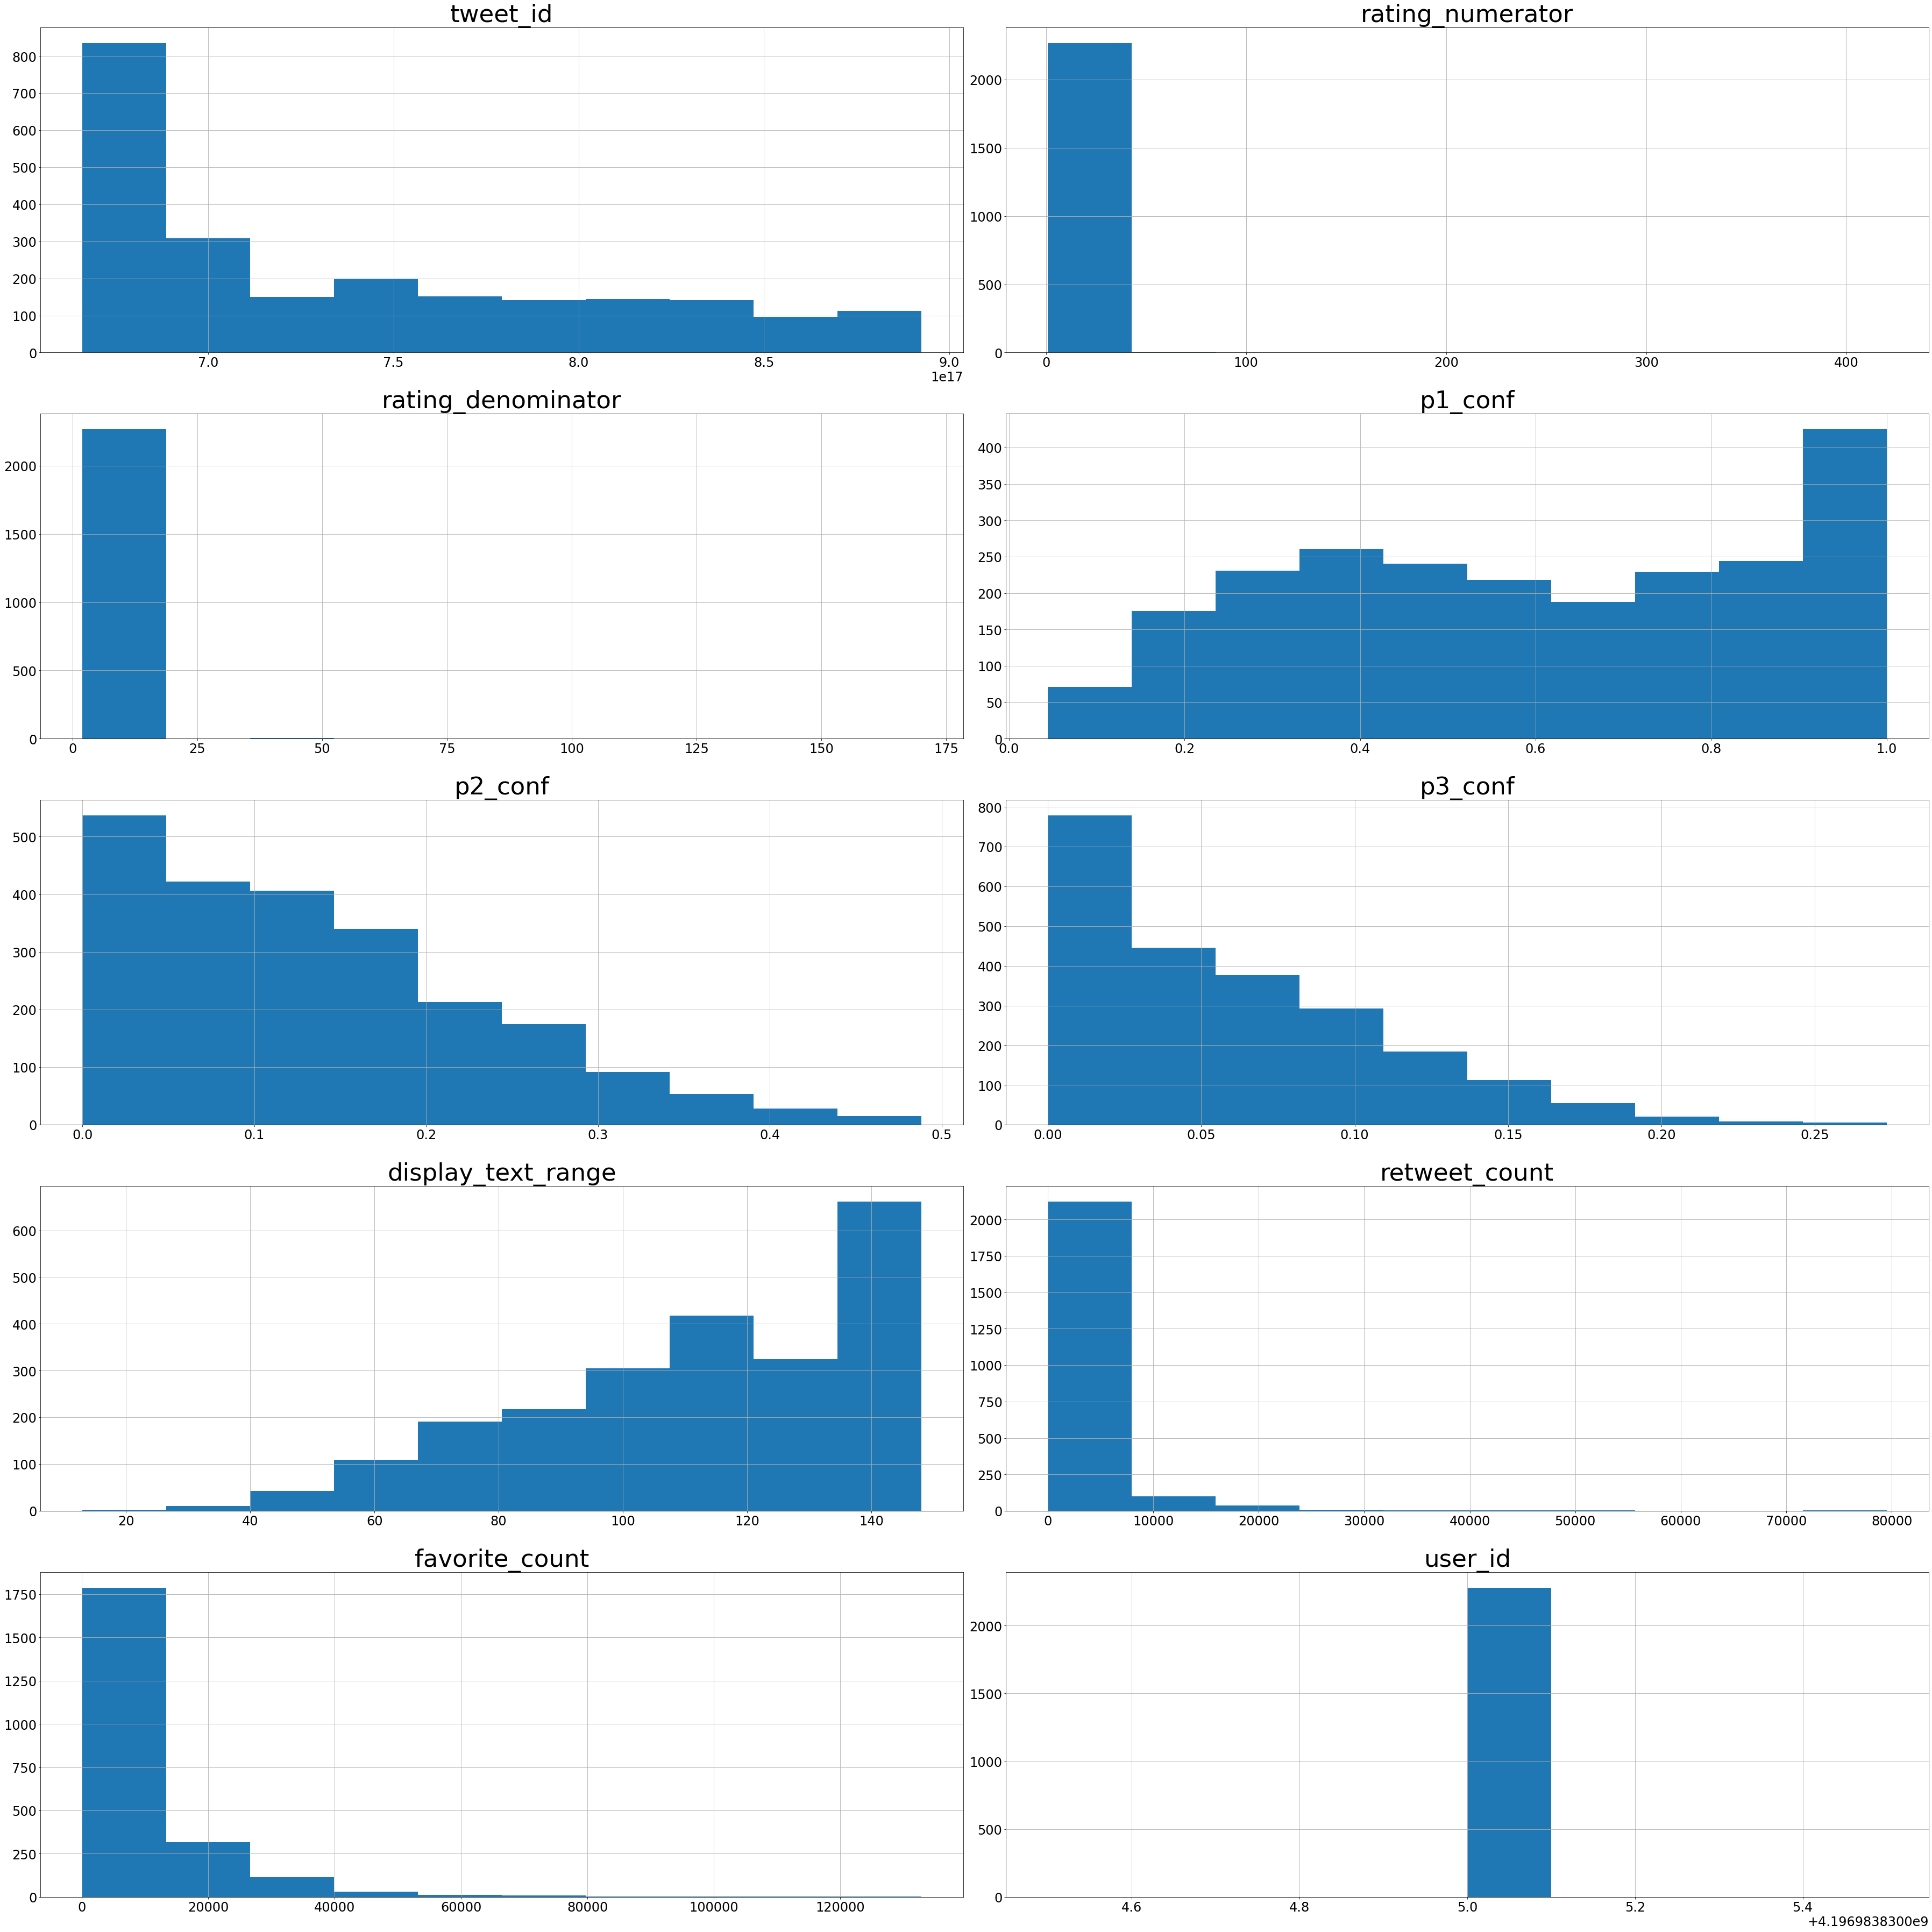

In [69]:
df_twitter.hist(layout=(5,2), figsize=(50,50))

plt.tight_layout()
plt.show()

The above plot shows most of the continuous values are highly skewed and therefore not considered normally distributed 

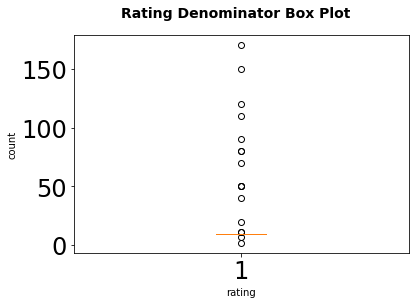

In [70]:
fig = plt.figure()
fig.suptitle('Rating Denominator Box Plot', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(df_twitter.rating_denominator);

ax.set_title('')
ax.set_xlabel('rating')
ax.set_ylabel('count')

plt.show()


Question 1: What breads of dogs are the most rated and least rated

In [71]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281 entries, 0 to 2280
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2281 non-null   int64  
 1   timestamp           2281 non-null   object 
 2   text                2281 non-null   object 
 3   expanded_urls       2281 non-null   object 
 4   rating_numerator    2281 non-null   int64  
 5   rating_denominator  2281 non-null   int64  
 6   name                2281 non-null   object 
 7   stage               2281 non-null   object 
 8   p1                  2281 non-null   object 
 9   p1_conf             2281 non-null   float64
 10  p1_dog              2281 non-null   bool   
 11  p2                  2281 non-null   object 
 12  p2_conf             2281 non-null   float64
 13  p2_dog              2281 non-null   bool   
 14  p3                  2281 non-null   object 
 15  p3_conf             2281 non-null   float64
 16  p3_dog

In [72]:
df_twitter.p1_dog.unique()

array([False,  True])

In [73]:
dogs = df_twitter.query('p1_dog == True')

rated = dogs.groupby('p1')['rating_numerator', 'rating_denominator'].mean()
most_rated = rated.sort_values(['rating_numerator'], ascending=False)
least_rated = rated.sort_values(['rating_numerator'], ascending=True)

most_rated

/var/folders/c9/8lp3ylpd2sl45tswp801h7bc0000gp/T/ipykernel_36646/2179142493.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rated = dogs.groupby('p1')['rating_numerator', 'rating_denominator'].mean()


,rating_numerator,rating_denominator
p1,,
clumber,27.000000,10.000000
soft-coated_wheaten_terrier,26.700000,27.000000
West_Highland_white_terrier,15.642857,14.285714
borzoi,14.444444,14.444444
Great_Pyrenees,14.352941,12.352941
...,...,...
Ibizan_hound,9.000000,10.000000
Scotch_terrier,9.000000,10.000000
Walker_hound,9.000000,10.000000


In [74]:
least_rated

,rating_numerator,rating_denominator
p1,,
Japanese_spaniel,5.000000,10.000000
Ibizan_hound,9.000000,10.000000
Scotch_terrier,9.000000,10.000000
Walker_hound,9.000000,10.000000
Welsh_springer_spaniel,9.000000,10.000000
...,...,...
Great_Pyrenees,14.352941,12.352941
borzoi,14.444444,14.444444
West_Highland_white_terrier,15.642857,14.285714


From the above, `clumber` is the most rated dog breed while `Japanese_spaniel` is the least rated

Question 2: Which dog types had the most retweets and favorites

In [75]:
most_liked = dogs.groupby('p1')['retweet_count', 'favorite_count'].mean().sort_values(['favorite_count'], ascending=False)
most_rted = dogs.groupby('p1')['retweet_count', 'favorite_count'].mean().sort_values(['retweet_count'], ascending=False)

/var/folders/c9/8lp3ylpd2sl45tswp801h7bc0000gp/T/ipykernel_36646/623295189.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_liked = dogs.groupby('p1')['retweet_count', 'favorite_count'].mean().sort_values(['favorite_count'], ascending=False)
/var/folders/c9/8lp3ylpd2sl45tswp801h7bc0000gp/T/ipykernel_36646/623295189.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_rted = dogs.groupby('p1')['retweet_count', 'favorite_count'].mean().sort_values(['retweet_count'], ascending=False)


In [76]:
most_liked

,retweet_count,favorite_count
p1,,
standard_poodle,11081.375000,25744.000000
Saluki,5133.750000,24060.000000
flat-coated_retriever,7455.400000,23002.100000
black-and-tan_coonhound,5538.000000,22645.000000
French_bulldog,5472.103448,20598.758621
...,...,...
groenendael,413.000000,1896.000000
Tibetan_terrier,557.750000,1841.000000
Japanese_spaniel,471.000000,1362.000000


In [77]:
most_rted

,retweet_count,favorite_count
p1,,
standard_poodle,11081.375000,25744.000000
flat-coated_retriever,7455.400000,23002.100000
Eskimo_dog,6342.434783,14185.826087
Afghan_hound,5976.000000,17326.666667
Lakeland_terrier,5837.333333,16347.000000
...,...,...
Welsh_springer_spaniel,517.000000,2699.000000
Japanese_spaniel,471.000000,1362.000000
Ibizan_hound,431.000000,1114.666667


`saluki` is the most favorited breed while `standard_poodle` is the most retweeted dog breed

Question 3: Which dog nicknames are ther most/least common

In [78]:
x = pd.DataFrame(dogs.stage.value_counts())
x

,stage
None,1463
pupper,151
doggo,57
puppo,20
floofer,8


Text(0, 0.5, 'Popularity')

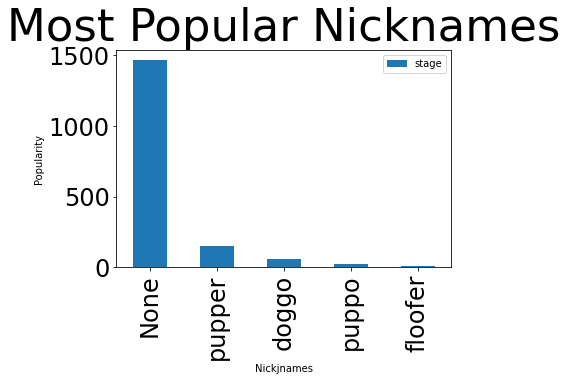

In [79]:
ax = x.plot(kind='bar', title='Most Popular Nicknames')
ax.set_xlabel("Nickjnames")
ax.set_ylabel("Popularity")

Question 4: What is the relationship between dogs breeds and their nicknames

In [81]:
stage_breed = pd.DataFrame(dogs.groupby(['p1', 'stage'])['rating_numerator'].mean())
stage_breed.sort_values(['rating_numerator'], ascending=False)

rating_numerator
p1                          stage                   
clumber                     None           27.000000
                            pupper         27.000000
soft-coated_wheaten_terrier None           26.700000
West_Highland_white_terrier None           15.642857
Great_Pyrenees              None           14.928571
...                                              ...
dalmatian                   doggo           8.500000
Italian_greyhound           pupper          8.000000
Chesapeake_Bay_retriever    pupper          8.000000
Newfoundland                pupper          7.000000
Japanese_spaniel            None            5.000000

[230 rows x 1 columns]

From above, most `clumbers` with no nickname or `pupper` nickname are the most rated. Most dog breed do not have nicknames while `pupper` is the most popular nickname amongst the dog breeds

# END